## Bike Rental Prediction

### Problem Statement

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goal:

    You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
rental = pd.read_csv("day.csv")

In [3]:
#dropping few festures which dont plsy role in my analysis
rental.drop(['dteday', 'instant','casual','registered'], axis=1, inplace=True)
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [4]:
#option used to view all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Replacing Values from Data Dictionary 

In [5]:
rental['weathersit'] = rental['weathersit'].replace([1,2,3,4],['Clear','Cloudy','Light Snow','Heavy Rain'])
rental['mnth'] = rental['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
rental['season'] = rental['season'].replace([1,2,3,4],['spring','summer','fall','winter'])
rental['weekday'] = rental['weekday'].replace([0,1,2,3,4,5,6,],['sun','mon','tues','wed','thru','fri','sat'])
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tues,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thru,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
rental.shape

(730, 12)

In [7]:
rental.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


The `cnt` looks equally divided i.e. looks like linearly distributed

In [8]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [9]:
rental.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There is no null value, so no need to perform data cleaning steps

## Data Visualizations

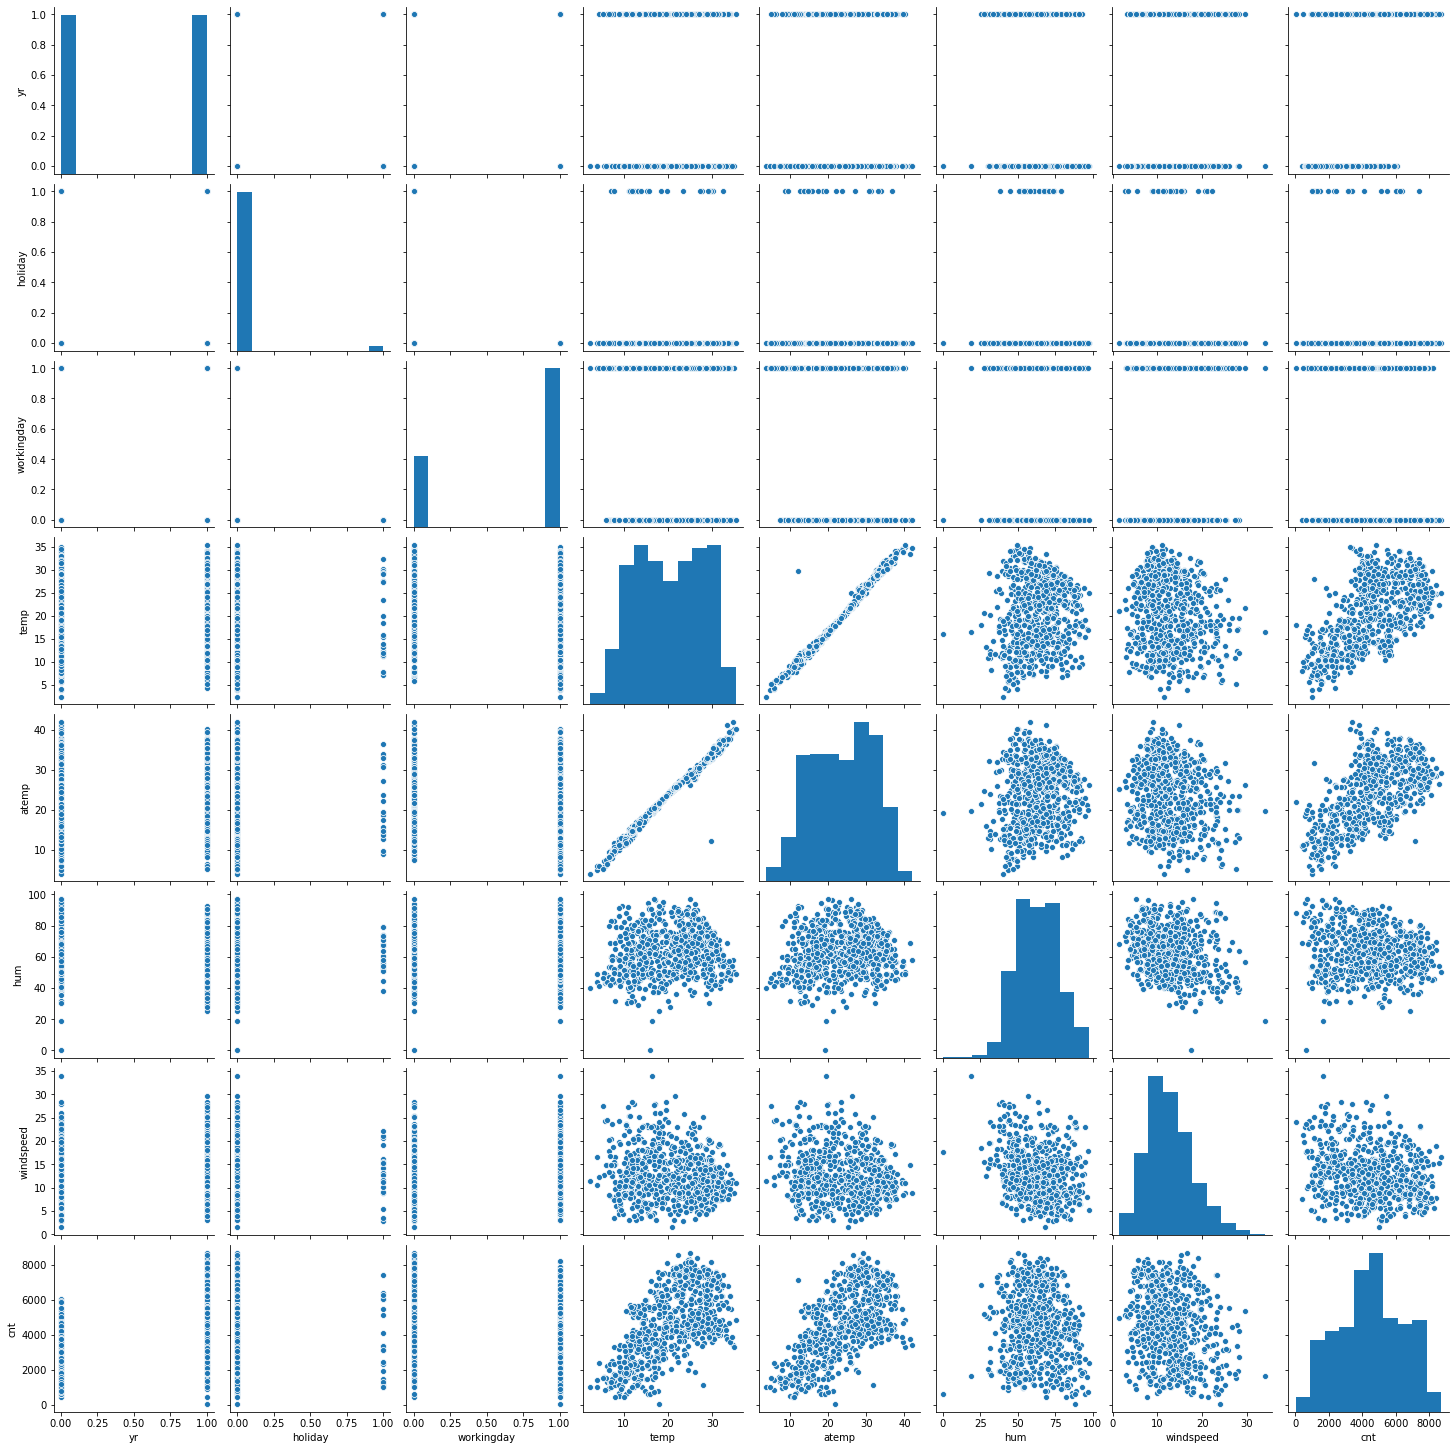

In [10]:
sns.pairplot(rental)
plt.show()

#### Visualising Numeric Variables

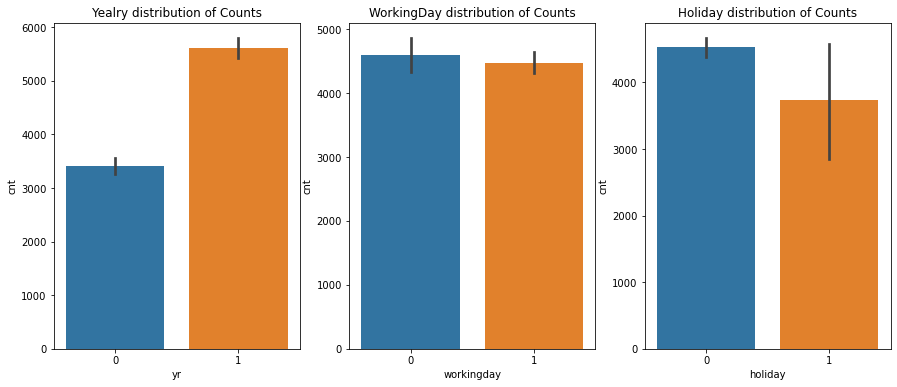

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.barplot(data=rental, x='yr', y='cnt')
plt.title('Yealry distribution of Counts')
plt.subplot(1,3,2)
sns.barplot(data=rental, x='workingday', y='cnt')
plt.title('WorkingDay distribution of Counts')
plt.subplot(1,3,3)
sns.barplot(data=rental, x='holiday', y='cnt')
plt.title('Holiday distribution of Counts')
plt.show()

#### Inference
    
    -Year 2019 has shown more demand in rental bikes than 2018 
    -Working day or non working day, demand is nearly same for rental bikes
    -Non Holidays has more demand of rental bikes 

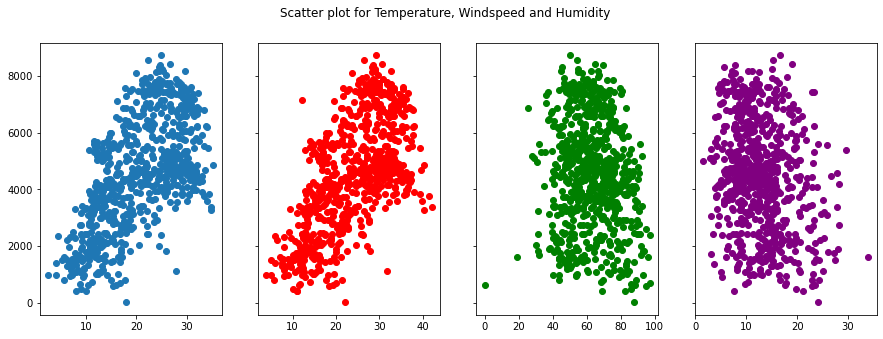

In [12]:
fig, ax = plt.subplots(1,4, figsize=(15, 5), sharey=True)
fig.suptitle('Scatter plot for Temperature, Windspeed and Humidity')
ax[0].scatter(data=rental, x='temp', y='cnt')
ax[1].scatter(data=rental, x='atemp', y='cnt', color = 'red')
ax[2].scatter(data=rental, x='hum', y='cnt', color = 'green')
ax[3].scatter(data=rental, x='windspeed', y='cnt', color = 'purple')
plt.show()

#### Inference
    Tempreture and Feeling tempreture are pretty much same in terms of demand, because they seems highly correlated
    Humidity, when its more than 30 then rental bikes are in most demanded
    With Windspeed less than 30, nearly all demand point lies, which is also understandable
    

#### Visualising Categorical Variables
    categorical variables, Let's make a boxplot for some of these variables
    -Season
    -Month
    -Weekdays
    -Weather Condition

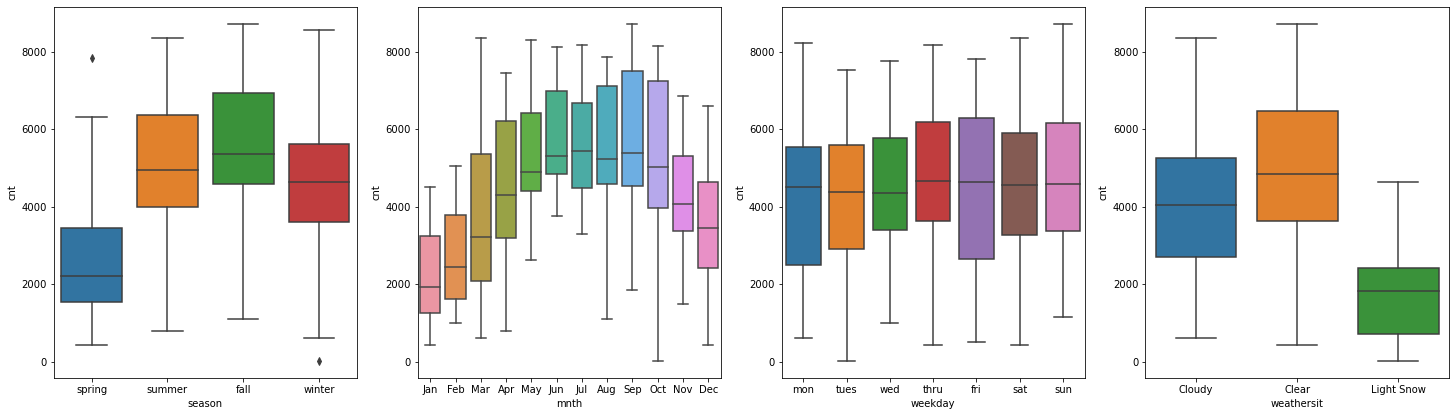

In [13]:
plt.figure(figsize=(25, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental)
plt.show()

#### INFERENCE

    Fall and Summer has high demand than winter and Spring is least of them all
    Month wise plots also show same result that demand is higest fall (ie Aug, Sep, Oct)
    On the terms of days, every day has nearly same demand
    Clear Weather has more counts and light snow has least, which is understandable

## Correlation Identifier

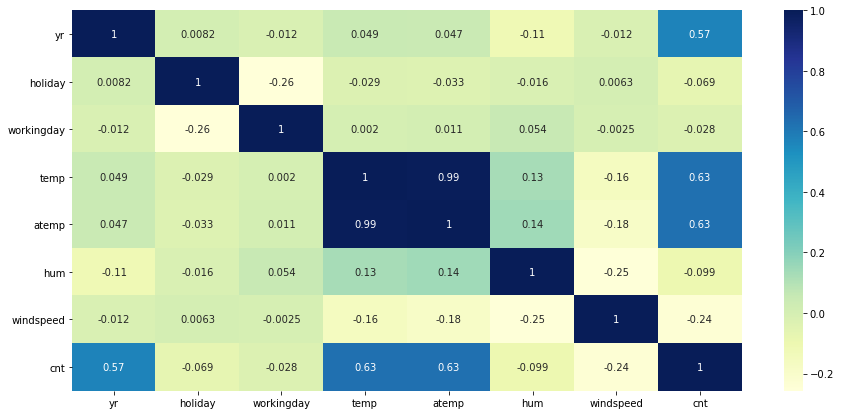

In [14]:
# heatmap to find correlation between columns or features
plt.figure(figsize=(15,7))
sns.heatmap(rental.corr(), annot = True, cmap= "YlGnBu")
plt.show()

As we notice here, year, atemp and temp is highy corelated, so we can drop one of it 

In [15]:
rental.drop(['atemp'], axis=1, inplace=True)
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,tues,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,thru,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


## Creating Dummy Variable

In [16]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

rental = dummies('season',rental)
rental = dummies('mnth',rental)
rental = dummies('weekday',rental)
rental = dummies('weathersit',rental)

In [17]:
rental.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,mon,sat,sun,thru,tues,wed,Cloudy,Light Snow
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
rental.shape

(730, 29)

## Splitting the Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(rental, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr','holiday','workingday','temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,mon,sat,sun,thru,tues,wed,Cloudy,Light Snow
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1.0,0.0,1.0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [24]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,mon,sat,sun,thru,tues,wed,Cloudy,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


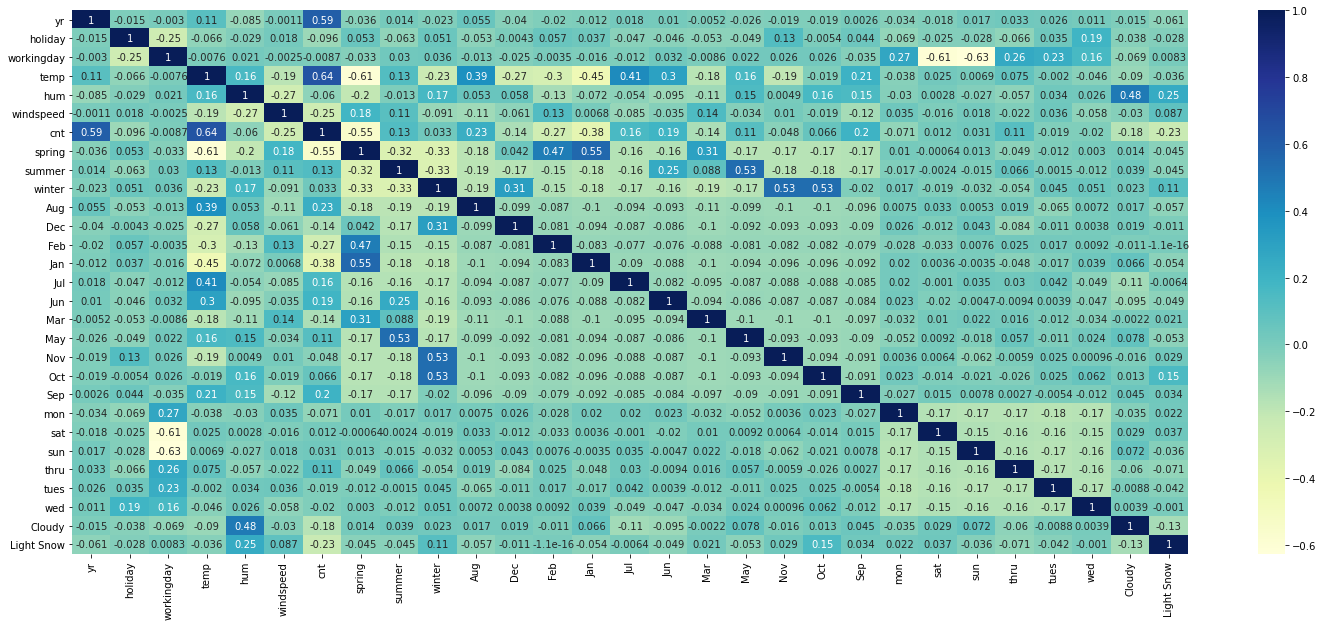

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variable to `cnt` is - temp, yr, jan, nov, may

## Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
x_train = df_train

## Building our model
    This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)



### RFE

Recursive feature elimination

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [29]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thru', False, 12),
 ('tues', False, 7),
 ('wed', False, 10),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1)]

In [30]:
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy', 'Light Snow'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [31]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Cloudy,Light Snow
653,1.0,0.0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,0.0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,0.0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,0.0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,0.0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [32]:
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary()) # model summary
    return x

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [34]:
x_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        19:32:38   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

### Checking VIF

In [35]:
checkVIF(x_train_new)

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
12,Nov,1.76
10,Jan,1.68
14,Cloudy,1.57
9,Dec,1.49


Dropping `dec` because of high P-value. (shows that dec has some multicollinearity.)

In [36]:
x_train_new = x_train_new.drop(["Dec"], axis = 1)

### MODEL 2

In [37]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.25e-189
Time:                        19:32:38   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

Dropping `Nov` because of high P-value. (shows that Nov has high multicollinearity.)

In [38]:
x_train_new = x_train_new.drop(["Nov"], axis = 1)

### Checking VIF

In [39]:
checkVIF(x_train_new)

,Features,VIF
0,const,76.77
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,hum,1.91
9,Jan,1.57
12,Cloudy,1.56
10,Jul,1.49
11,Sep,1.30


dropping `spring` because of high VIF value. (shows that spring has high multicollinearity.)

In [40]:
x_train_new = x_train_new.drop(["spring"], axis = 1)

### MODEL 3

In [41]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          6.03e-190
Time:                        19:32:38   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2444      0.028      8.658      0.0

Dropping `Jan` because of Medum range of P-value. (shows that Jan has some multicollinearity.)

In [42]:
x_train_new = x_train_new.drop(["Jan"], axis = 1)

### Checking VIF

In [43]:
checkVIF(x_train_new)

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
10,Cloudy,1.55
8,Jul,1.43
6,summer,1.33
7,winter,1.29
11,Light Snow,1.24
9,Sep,1.19
5,windspeed,1.18


### MODEL 4

In [44]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          3.89e-190
Time:                        19:32:38   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.027      8.368      0.0

Dropping `Jul` because of Medum range of P-value. (shows that Jul has some multicollinearity.)

In [45]:
x_train_new = x_train_new.drop(["Jul"], axis = 1)

## MODEL 5

In [46]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          7.80e-190
Time:                        19:32:39   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2256      0.027      8.314      0.0

### Checking VIF

In [47]:
checkVIF(x_train_new)

,Features,VIF
0,const,44.99
4,hum,1.86
9,Cloudy,1.55
3,temp,1.27
7,winter,1.25
10,Light Snow,1.23
6,summer,1.19
5,windspeed,1.18
8,Sep,1.11
1,yr,1.03


## Residual Analysis of the train data
    
    So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [48]:
lm = sm.OLS(y_train,x_train_new).fit()
y_train_price = lm.predict(x_train_new)

Text(0.5, 0, 'Errors')

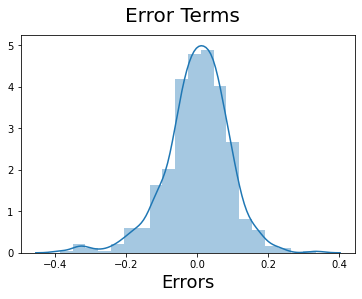

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, 
    
    i.e. Fifth Model.

### Applying the scaling on the test sets

In [50]:
num_vars = ['yr', 'holiday', 'workingday', 'temp', 'hum','windspeed','spring','summer','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [51]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,mon,sat,sun,thru,tues,wed,Cloudy,Light Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [52]:
y_test = df_test.pop('cnt')
x_test = df_test

In [53]:
# Now let's use our model to make predictions.
x_train_new = x_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [54]:
# Making predictions
y_pred = lm.predict(x_test_new)

## Evaluation of test via comparison of y_pred and y_test

In [55]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8039622421267125

Text(0, 0.5, 'y_pred')

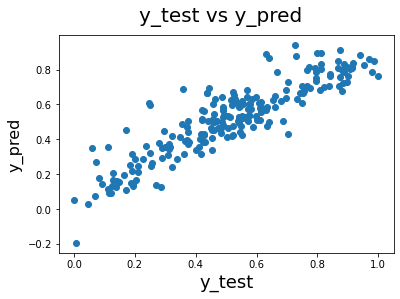

In [56]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)  
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [57]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          7.80e-190
Time:                        19:32:40   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2256      0.027      8.314      0.0

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.840 and 0.836 - `84%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 257.6 and 7.80e-190(approx. 0.0) - Model fit is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

## Conclusion

### Based on my prediction, the top three features are: Temperature, Year, Season (Winter and Summer)